# Data Modelling

# 1. Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# to see plots in jupyter notebook
%matplotlib inline

# set plot style
sns.set(color_codes = True)

# 2. Load data

In [3]:
df = pd.read_csv("D:/DATA ANALYSIS/BCGX POWER CO/DATA sets/data_for_predictions.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# 3. Data modelling

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Data Sampling

In [5]:
# make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
x = df.drop(columns = ['id', 'churn'])
y = df['churn']
print(x.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


## Model Training

In [8]:
# Adding model training
model = RandomForestClassifier(random_state = 42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [13]:
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9038882803943045

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.52      3652
weighted avg       0.90      0.90      0.86      3652



In [16]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [17]:
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [19]:
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


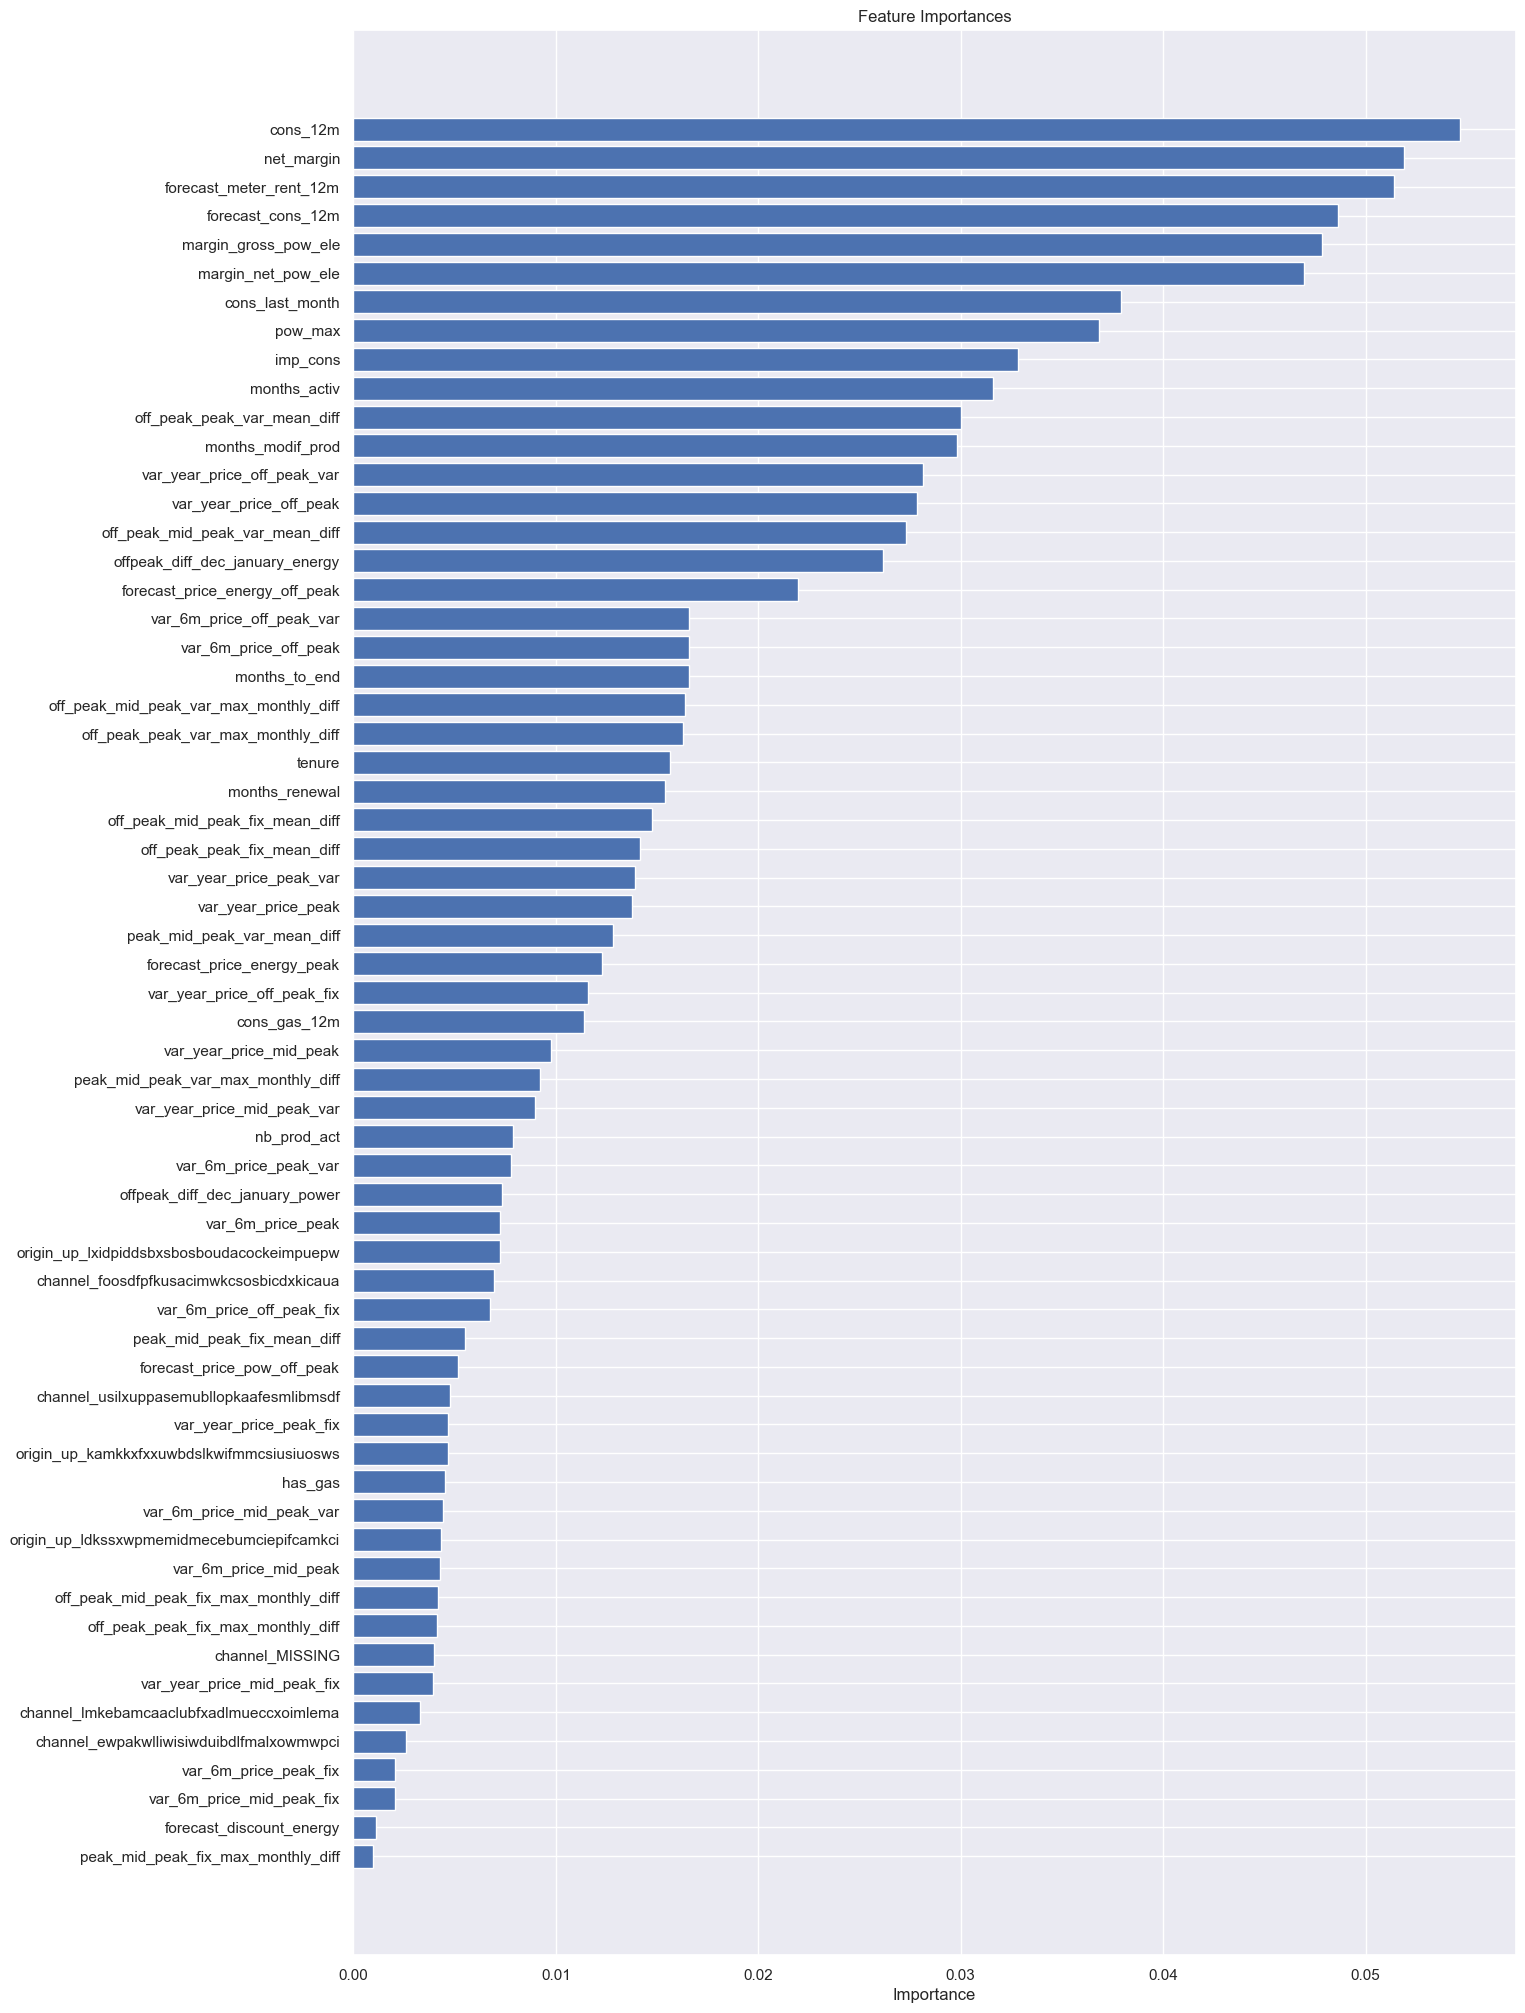

In [20]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [23]:
proba_predictions = model.predict_proba(x_test)
probabilities = proba_predictions[:, 1]

In [25]:
X_test = x_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [27]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')